In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

loan = pd.read_csv('loan.csv')
loan.head()
loan.shape

C:\Users\bidee\AppData\Local\Temp\ipykernel_17696\2648016527.py:6: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv('loan.csv')


(39717, 111)

# Cleaning the data

In [4]:


dtype_dict = {
    'emp_length': str  
}

loan = pd.read_csv('loan.csv', dtype=dtype_dict, low_memory=False)

print("Dataset shape before cleaning:", loan.shape)

missing_values = loan.isnull().sum()
print("Missing values in the dataset:")
print(missing_values[missing_values > 0])

threshold = len(loan) * 0.5
loan = loan.dropna(thresh=threshold, axis=1)

num_cols = loan.select_dtypes(include=['float64', 'int64']).columns
loan[num_cols] = loan[num_cols].fillna(loan[num_cols].median())

cat_cols = loan.select_dtypes(include=['object']).columns
loan[cat_cols] = loan[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

loan = loan.drop_duplicates()
loan = loan[loan['loan_status'] != 'Current']


print("Dataset shape after cleaning:", loan.shape)

loan.to_csv('cleaned_loan_data.csv', index=False)

print(loan.head())


Dataset shape before cleaning: (39717, 111)
Missing values in the dataset:
emp_title                      2459
emp_length                     1075
desc                          12940
title                            11
mths_since_last_delinq        25682
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 68, dtype: int64
Dataset shape after cleaning: (38577, 54)
        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
5  1075269    1311441       5000         5000           5000.0   36 mont

# Univariate Analysis

Univariate Analysis:
Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64


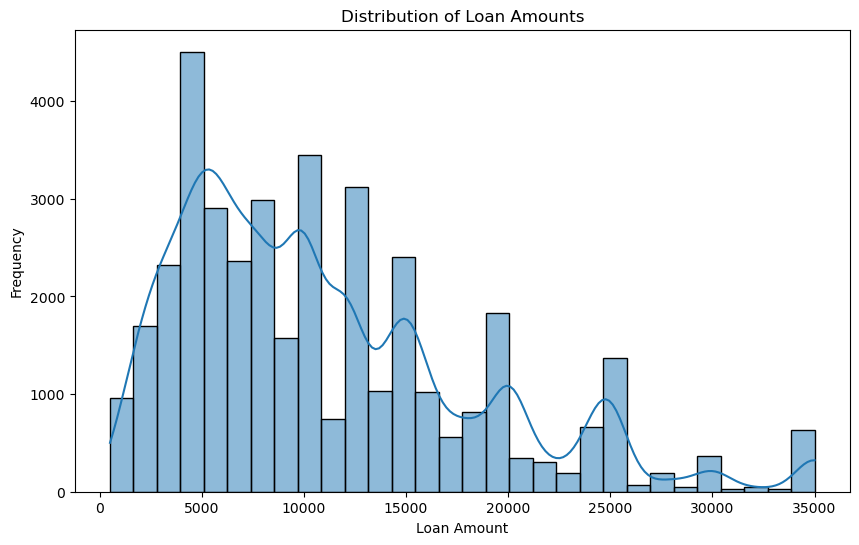

In [5]:
print("Univariate Analysis:")
print(loan['loan_status'].value_counts())

plt.figure(figsize=(10, 6))
sns.histplot(loan['loan_amnt'], kde=True, bins=30)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

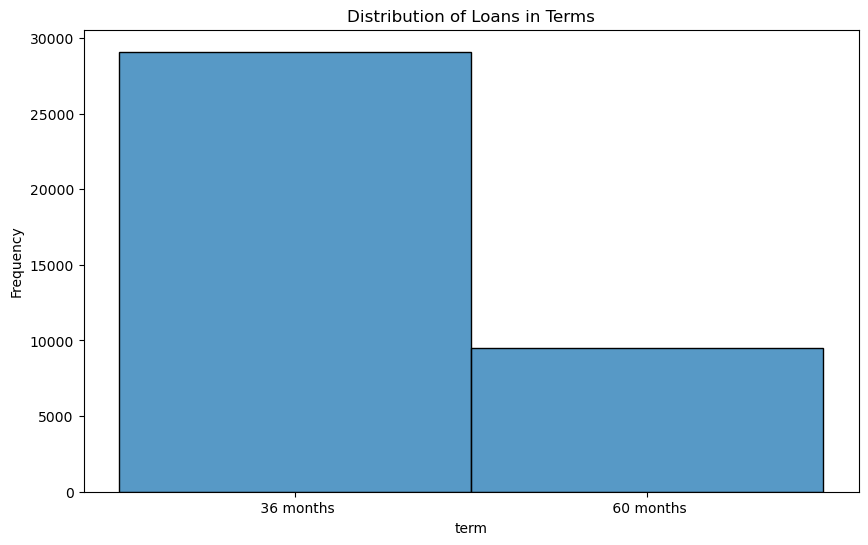

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(loan['term'])
plt.title('Distribution of Loans in Terms')
plt.xlabel('term')
plt.ylabel('Frequency')
plt.show()

# Bivariate Analysis

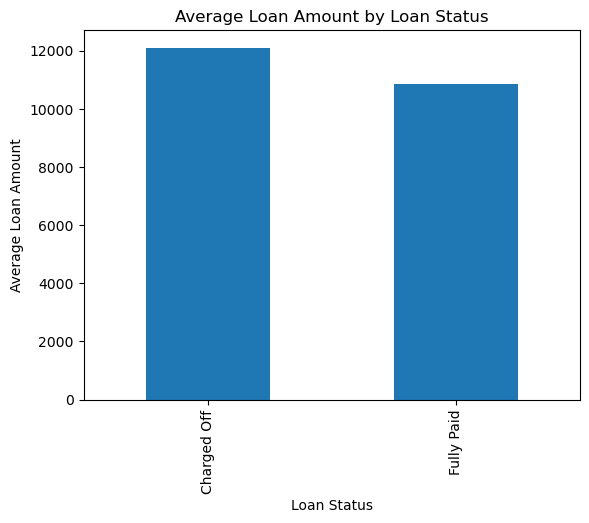

In [7]:
loan.groupby('loan_status')['loan_amnt'].mean().plot(kind='bar')
plt.title('Average Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Average Loan Amount')

plt.show()

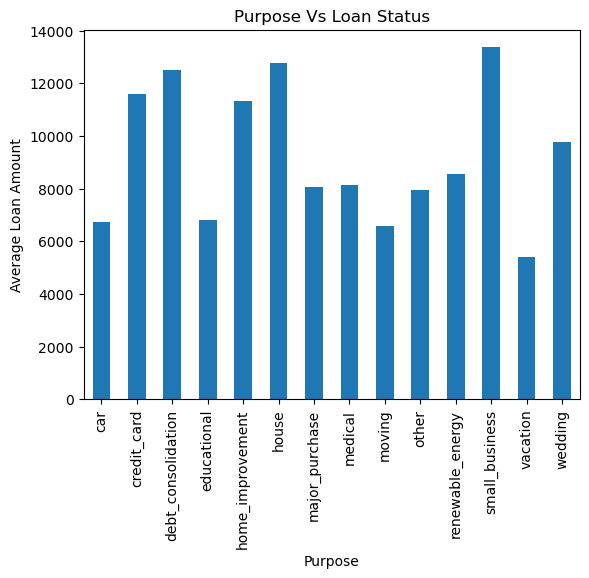

In [12]:
loan.groupby('purpose')['loan_amnt'].mean().plot(kind='bar')
plt.title('Purpose Vs Loan Status')
plt.xlabel('Purpose')
plt.ylabel('Average Loan Amount')

plt.show()

<Figure size 1400x800 with 0 Axes>

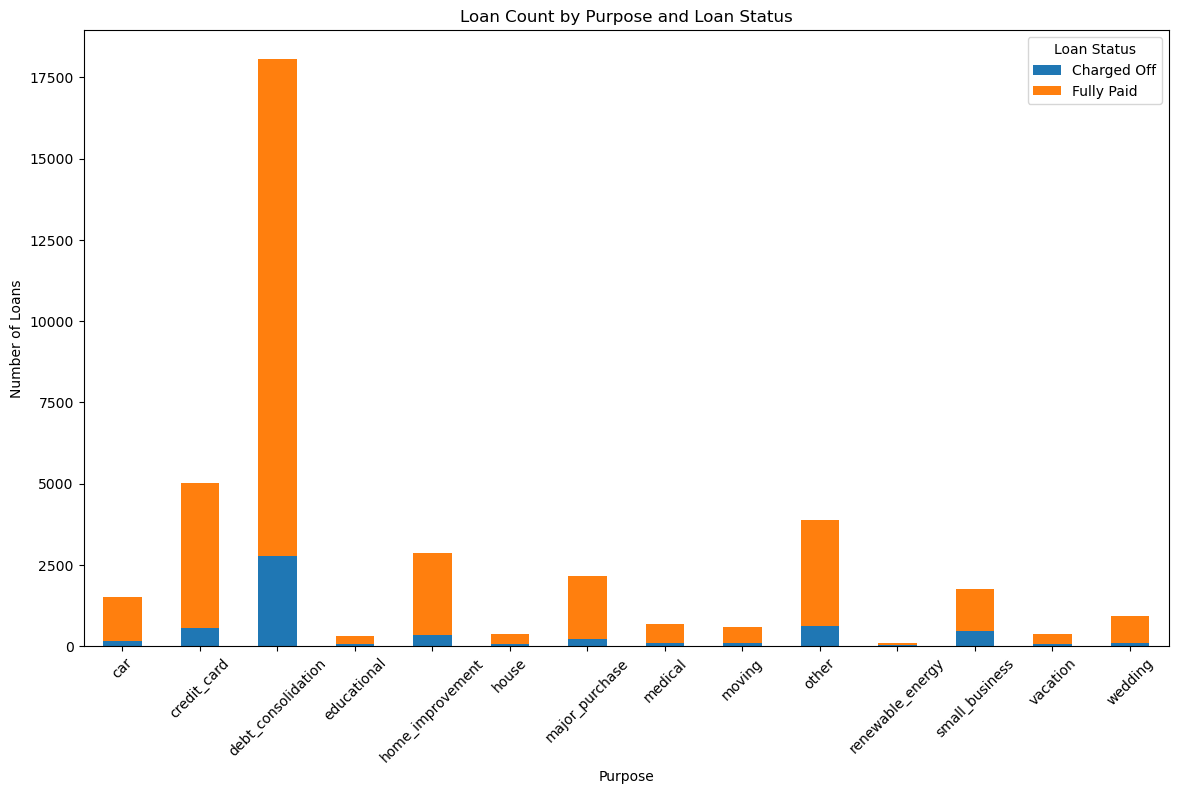

In [10]:
loan_fig_3 = loan.groupby(['purpose', 'loan_status']).size().unstack(fill_value=0)
plt.figure(figsize=(14, 8))
loan_fig_3.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Loan Count by Purpose and Loan Status')
plt.xlabel('Purpose')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()

<Figure size 1400x800 with 0 Axes>

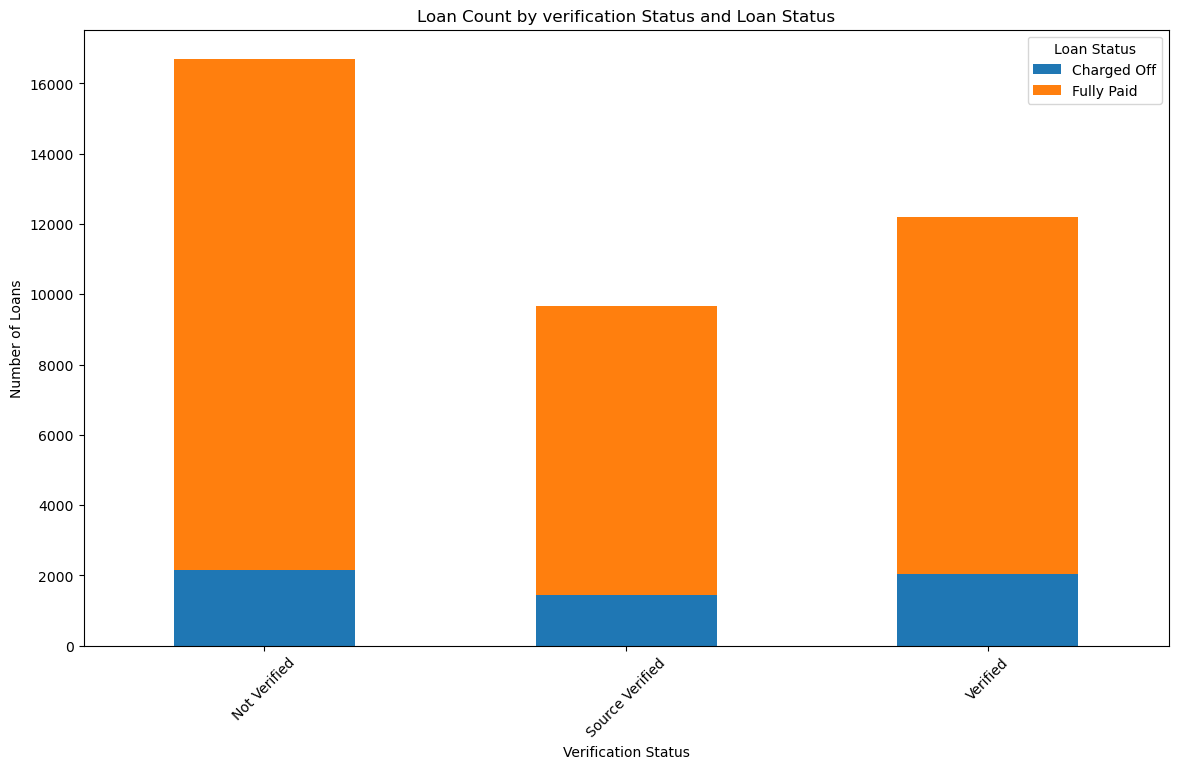

In [18]:
loan_fig_4 = loan.groupby(['verification_status', 'loan_status']).size().unstack(fill_value=0)
plt.figure(figsize=(14, 8))
loan_fig_4.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Loan Count by verification Status and Loan Status')
plt.xlabel('Verification Status')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()